# Descriptive statistics

**Descriptive statistics** are a set of tools we can use to extract the main information from a large set of data points.The most commom tools


Measures of central tendency:
1. Mean
2. Median
3. Mode

Measures of dispersion:
1. Standard deviation and variance
2. Quantiles, quartiles and percentiles

Useful analytical tools for reporting:

1. Detection of outliers
2. Correlation coefficient


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [2]:
# Reading dataset
rentals = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")
rentals.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


-----
# PART 1: Measures of central tendency

The **mean** is with no doubt the most commom way of expressing the central tendency of the data. However, in many cases, the median or the mode are more appropriate. We must know when it is best to use each of these measures.   

The **median** is the value that divide the data points into 2 groups of same size (same number of observations/datapoints).

The **mode** is the most commom value in a set of data points.


![Mean, meadian and mode](https://images.prismic.io/sketchplanations/6ba54e4b-f936-4cf6-bc4e-a889a439c454_81825142840.jpg)

## Mean and median

For `means` and`medians`in `Python`: we can use `numpy` and `pandas`

In [3]:
a = [5, 7, 2, 10, 13, 2000]
np.mean(a)

339.5

In [4]:
b = [276, 53, 7, 104, 13, 20]
np.sort(b)

array([  7,  13,  20,  53, 104, 276])

In [5]:
c = [276, 53, 7, 13, 20]
np.sort(c)

array([  7,  13,  20,  53, 276])

In [6]:
np.median(a), np.median(b), np.median(c)

(8.5, 36.5, 20.0)

**The median is not affected by the extreme values of a variable**. 
This is the most important property of the median that you must always remember.
How can we demonstrate that in practice?

In [7]:
np.median([1, 4, 7, 8, 10])

7.0

In [8]:
np.median([1, 4, 7, 8, 1000])

7.0

### Let's compare the mean and median rent prices in Berlin

In [9]:
rentals.Rent.mean()

1768.560942408377

In [10]:
rentals.Rent.median()

1565.48

If both the mean and median are describing the central tendency of the same data, why are they so different?

Use a **histogram** in the data to try to find the answer:  

*Also check [this blog post](https://chartio.com/learn/charts/histogram-complete-guide/) for a very good tutorial on histograms*

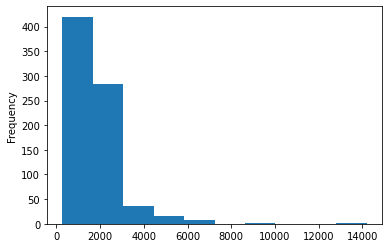

In [11]:
rentals.Rent.plot.hist()

The histogram above shows an example of a variable with **skewed distribution**. It means that there are more datapoints on the left side of the mean than on the right side. In these cases, the median is lower than the mean. Since the median is not affected by the extreme values of a variable, it is more appropriate to use it when the distribution is skewed.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/sk1.png" width="600">


**The use of mean is only apropriate when the distribution is symmetrical**

**The more skewed the distribution, the more different are the central tendency**

-----
## Mode

This is the most apropriate measure for discrete data, or categorical data (where we make counts of categories)
Samples can have one (unimodal), two (bimodal), or many (multimodal) modes

<img src="https://miro.medium.com/max/810/1*-jZA9f5l1RaEKvPoFMz5BQ.png" alt="Drawing" width="300"/> 

**Example:**
In the rentals dataset, what is the age of most apartments? When where they build?

 In other words, what is the **mode** of the variable `year_construction`?

In [12]:
# Mode stands for more frequent
rentals.Year_Construction.value_counts().sort_values(ascending=False).head(4)

2019    181
2018     58
2020     58
1900     52
Name: Year_Construction, dtype: int64

Is the distribution of `year_construction` unimodal, bimodal, or multimodal?

In [14]:
# Percentage of most common value
rentals.Year_Construction.value_counts(normalize=True).head(10)

2019    0.236911
2018    0.075916
2020    0.075916
1900    0.068063
2017    0.058901
2016    0.036649
2015    0.035340
1997    0.020942
2014    0.019634
1910    0.018325
Name: Year_Construction, dtype: float64

In [64]:
rentals.Year_Construction.mean()

1983.6950261780105

**Instead of saying that the average year of construction is 1983 (not so informative), say that most (24%) apartments in the dataset are from year 2019**

**Bimodal distribution**

The plot shows the number of customers that visit a restaurant and the hour that they visit. We can see the 2 modes (2 peaks), representing the lunch peak (12PM) and the dinner peak (7PM). It would be very misleading to use the mean to summarize the time when customers come to the restaurant, because it would be somewhere before 4PM, which is in fact, the time when the restaurant is the least busy

<img src="https://www.statology.org/wp-content/uploads/2020/06/bimodal3.png" alt="Drawing" width="500"/> 

### EXERCISE 1

Describe the size of apartments in Berlin, in terms of **number of rooms** and **square meters**. Did it change over the years? Which one is more easy to find? Which one is more expensive?

In [16]:
rentals.head(3)

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.0,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.0,2020,29.33
2,Köpenick,well_kept,2.0,979.0,1997,83.61


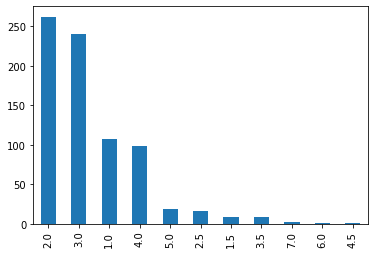

In [17]:
rentals.Rooms.value_counts().sort_values(ascending=False).plot.bar()

In [18]:
# Most frequent number of rooms can be found from the mode
rentals.Rooms.mode()

0    2.0
dtype: float64

In [19]:
# For positive skew, the median is more apropriate
rentals.Space.median()

77.6

Instead of looking the raw data, we can use central tendency

In [20]:
# Square meter over the years
space_over_years = rentals.groupby('Year_Construction')['Space'].median().reset_index()
space_over_years

,Year_Construction,Space
0,1864,106.980
1,1867,236.000
2,1870,99.000
3,1873,140.130
4,1874,50.000
...,...,...
88,2016,77.470
89,2017,56.000
90,2018,75.595
91,2019,85.600


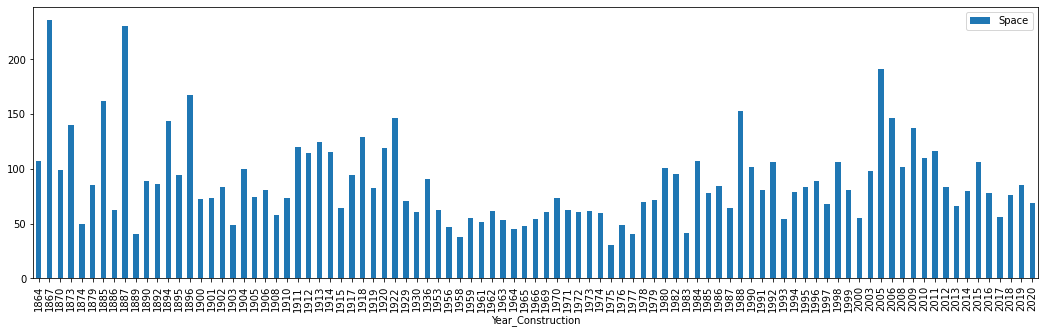

In [21]:
space_over_years.plot.bar(x='Year_Construction', y='Space', figsize=(18,5))

----
# PART 2: Measures of dispersion

Everytime we use some measure of central tendency (mean, median) it is **best practice** to show some measure of dispersion. They help us understand how well the mean/median is representing the data.

Commom measures of dispersion:
* standard deviation
* quartiles or interquartile range (IQR)
* 95% confidence intervals



## Standard deviation 


* The most common dispersion metric is the **standard deviation**, 
* the best tool to help us understand the dispersion in our data is the **histogram**.

To calculate the **standard deviation**:


1.   Calculate the mean
2.   Calculate the distance of each datapoint to the mean and squared it
3.   Sum the squared values 
4. divide the sum by the number of samples (at this point we have calculated the **variance**)
5.   Take the squared root of the final value



In [22]:
# Why we square the distances in step 2? Because of an important property of the mean:
values = [2, 3, 40, 56, 900]
mean = np.mean(values)
np.sum(values-mean)

0.0

Calculating the **standard deviation** of a sample:

In [23]:
# What is the mean height of the participants our class (in cm)?
values = [160, 169, 165, 168, 168, 168, 173, 180, 139]
mean = np.mean(values)
variance = np.sum(((values-mean)**2))/len(values)
sd = np.sqrt(variance)

Note: squared numbers have no unit, that is why we squared root it

In [24]:
sd

10.699024993076197

In [25]:
# Making sure we calculated right, within comparing with the numpy function
assert np.std(values) == sd

### Interpretation of standard deviation:  

when the standard deviation is high (relative to the mean), it means a lot of variability in the data.   
It makes it way more difficult to make clear conclusions from data that is highly variable. 

Histograms can help a lot to understand the distribution of our values:

<img src="https://d20khd7ddkh5ls.cloudfront.net/high_low_standard_deviation.png" width="300" />


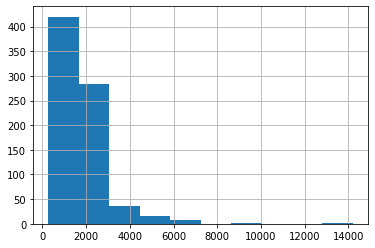

In [26]:
rentals.Rent.hist()

In [27]:
# combining groupby() and agg() in pandas to calculate means and std deviations per groups
def std(x): 
    return np.std(x)

agg_dict = {'Rent': ['mean', std]}
rentals.groupby('Rooms').agg(agg_dict)

Rent             
              mean          std
Rooms                          
1.0     833.258318   299.915135
1.5     882.735556   382.400058
2.0    1358.017786   647.899098
2.5    1691.043750   785.327397
3.0    2048.237042   815.855843
3.5    1901.928750   628.350896
4.0    2690.214242   941.207530
4.5    1370.000000     0.000000
5.0    4359.084211  2991.607028
6.0    3739.460000     0.000000
7.0    5082.175000   794.175000

Text(0.5, 1.0, 'Meand and s.d. of rent prices, according to the number of rooms')

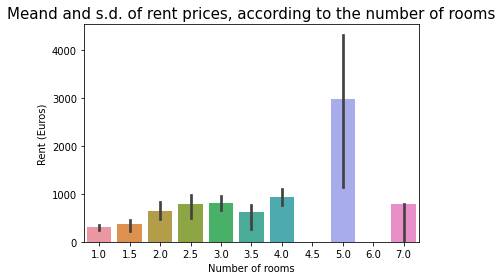

In [28]:
# let's visualize the mean and standard deviation in a single plot
ax = sns.barplot(
    x='Rooms',
    y='Rent',
    data=rentals,
    estimator=np.std
)
ax.set_xlabel('Number of rooms', fontsize=10)
ax.set_ylabel('Rent (Euros)', fontsize=10)
ax.set_title('Meand and s.d. of rent prices, according to the number of rooms', fontsize=15)

## **Quantiles and percentiles**  

They tell us how many samples (datapoints) we can expect in a specific range. There's a nice blog post about it [here](https://medium.com/@vinitasilaparasetty/quartiles-for-beginners-in-data-science-cad074cf5d65)  

**Quartiles** are 3 values that divide the datapoints into 4 portions (the 25%, 50%, 75%, 100%)


Imagine we have a class with 11 students and they take a test. The image below shows the scores of each student in a test, sorted in ascending order (2 students had 2 points, one student had 4 points and so on). Interpretation:  

* The **first quartile** is 4, which means that 25% of the students had a score of up to 4 points.  
* The **second quartile** is 5, which means that 50% of the students had a score of up to 5 points.  
* The **third quartile** is 9, which means that 75% of the students had a score of up to 9 points.   

<img src="https://cdn.scribbr.com/wp-content/uploads/2022/05/Quartile-example.webp" width="500" />

**Percentiles** are any fraction of the data we might be interested (from 0 to 1)

In [29]:
# 25% of the lowest rents
rentals.Rent.quantile(0.25)

1039.5

In [30]:
# the top 25% most expensive apartments cost at least 2170 Euros
rentals.Rent.quantile(0.75)

2170.0

In [31]:
# median
rentals.Rent.quantile(0.5), rentals.Rent.median()

(1565.48, 1565.48)

In [32]:
# 10% of cheapest apartments cost up to 719.7 Euros
rentals.Rent.quantile(0.1)

719.692

In [33]:
# the top 10% most expensive apartments cost at least 2811 Euros
rentals.Rent.quantile(0.9)

2811.814

In [34]:
# you can choose any percentile from 0 to 1
rentals.Rent.quantile(0.18)

900.0

In [35]:
# most expensive appartment
rentals.Rent.quantile(1), rentals.Rent.max()

(14207.0, 14207.0)

### Interquartile range

IQR is also a measure of dispersion, and is the range between the first and the third quartiles namely Q1 and Q3:  

**IQR = Q3 – Q1**

We know that 50% of all datapoints fall within the range between Q1 and Q3

In [36]:
# what is the IQR of the age of apartments in Berlin?
median = rentals.Year_Construction.quantile(0.5)

q1= rentals.Year_Construction.quantile(0.25)
q3= rentals.Year_Construction.quantile(0.75)

print("Q1 and Q3 are", q1, q3)
print(f"The median is {median} and IQR of age is {q3-q1}")

Q1 and Q3 are 1959.0 2019.0
The median is 2015.0 and IQR of age is 60.0


## Confidence intervals

Confidence intervals are a tool to help **generalize** our findings to a bigger sample, which we did not/ cannot measure ourselves. 

*Example*: we can measure the height of all students in this class, but we cannot obtain the heights of all human beings alive. But after having a sample of some individuals, we might want to generalize the findings to the entire country population.

In [37]:
# Example of usage in Python:
data = [160, 160, 166, 173, 155, 176, 156]

#create 95% confidence interval for the sample above
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=np.std(data)) 


(145.09227897398267, 182.33629245458877)

In [38]:
np.mean(data).round(2)

163.71

**Interpretation: while the mean of the data is about 163.71, we know that when we generalize to the whole population, we can estimate that 95% of the time the data range will be between 145 - 182**

Can you calculate the mean rent per region of Berlin, and add the standard deviation and 95% confidence interval for each mean?

In [39]:
rentals.head(2)

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.0,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.0,2020,29.33


In [40]:
# Mean rent and standard deviation per region of Berlin
mean_std = rentals.groupby('Region')['Rent'].agg(['mean', 'std'])
mean_std

,mean,std
Region,,
Charlottenburg,1753.452532,1125.786523
Friedrichsfelde,1043.871731,403.402469
Kreuzberg,2049.138085,1172.802355
Köpenick,1125.475818,390.822563
Mitte,2408.725033,1543.059190
Neukölln,1188.114915,552.145415
Prenzlauer,1996.962264,1088.544439
Tiergarten,1914.824795,786.464690
Wedding,847.138571,333.446416


In [41]:
# Confidence Interval
CI = mean_std.apply(lambda x: stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=np.std(x)), axis=1).to_frame(name='CI')
CI

,CI
Region,
Charlottenburg,"(-2548.0068758910706, 5427.245930939527)"
Friedrichsfelde,"(-3345.3296862653624, 4792.603885679383)"
Kreuzberg,"(-3956.480383163768, 7178.420823135066)"
Köpenick,"(-3909.1781468258587, 5425.476527700731)"
Mitte,"(-3523.7716065778877, 7475.55582886286)"
Neukölln,"(-3170.249172906346, 4910.509503181728)"
Prenzlauer,"(-4228.51808392877, 7314.024787195265)"
Tiergarten,"(-5817.942516406152, 8519.232001472785)"
Wedding,"(-2673.2463548109818, 3853.8313423361515)"


In [42]:
mean_rent_per_region = pd.merge(mean_std, CI, on="Region")
mean_rent_per_region

,mean,std,CI
Region,,,
Charlottenburg,1753.452532,1125.786523,"(-2548.0068758910706, 5427.245930939527)"
Friedrichsfelde,1043.871731,403.402469,"(-3345.3296862653624, 4792.603885679383)"
Kreuzberg,2049.138085,1172.802355,"(-3956.480383163768, 7178.420823135066)"
Köpenick,1125.475818,390.822563,"(-3909.1781468258587, 5425.476527700731)"
Mitte,2408.725033,1543.059190,"(-3523.7716065778877, 7475.55582886286)"
Neukölln,1188.114915,552.145415,"(-3170.249172906346, 4910.509503181728)"
Prenzlauer,1996.962264,1088.544439,"(-4228.51808392877, 7314.024787195265)"
Tiergarten,1914.824795,786.464690,"(-5817.942516406152, 8519.232001472785)"
Wedding,847.138571,333.446416,"(-2673.2463548109818, 3853.8313423361515)"


# Summarizing with tables and plots

`Pandas describe()`

Pandas offers a very useful tool to describe all your dataset at once:

In [43]:
rentals.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,764.0,2.549738,1.010826,1.00,2.0000,2.50,3.00,7.00
Rent,764.0,1768.560942,1118.263961,271.25,1039.5000,1565.48,2170.00,14207.00
Year_Construction,764.0,1983.695026,48.006060,1864.00,1959.0000,2015.00,2019.00,2020.00
Space,764.0,84.656270,44.195338,14.00,55.0975,77.60,104.45,413.91


### Boxplots

Boxplots offer a visual summary of the data

<img src="https://www.wellbeingatschool.org.nz/sites/default/files/W@S_boxplot-labels.png" width="400" />

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


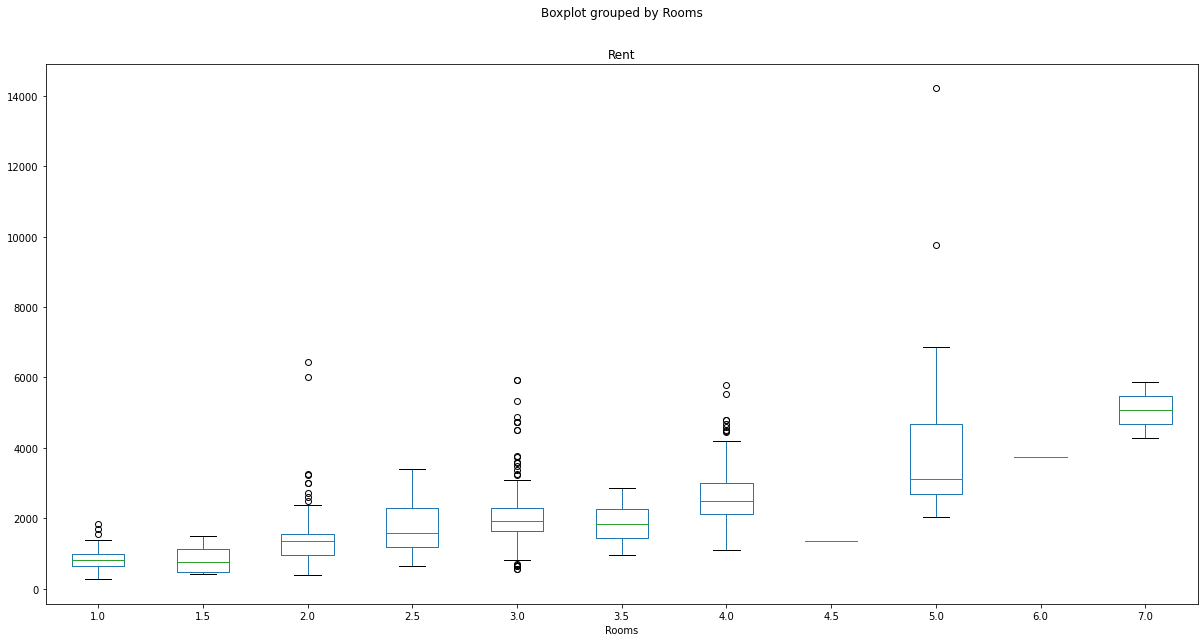

In [44]:
rentals.boxplot(by ='Rooms', column =['Rent'], grid = False, figsize=(20,10))

# SUMMARY - Parts 1 and 2
## Best practices for reporting 



*   Always start with histograms to check if the distribution is symmetrical or asymmetrical, unimodal, bimodal, or multimodal
*   Based on the shape of the distribution, choose to use either the mean or median 
* Use standard deviation with the mean, or IQR with the median
* If the data is discrete or categorical, don't use means or medians. Instead, show the frequency (%) of most relevant categories (the mode/modes)

---


# PART 3

## Outlier detection

Outliers are observations that have a very low probability of occurring, if we can trust that we obtained a representative sample of the variable that we are analysing.

Reasons for the presence outliers:


1.   Human mistakes like typos, data conversion
2. Technical mistakes (equipment malfunctioning)
3.   Biased sampling
4. Presence of rare underlying factors that we know already, or not

What can we do with them?


*   If we know that they were mistakes in data collection or data preparation, we can fix them or remove them
*   Improve the sampling strategy and increase sample size


This [blog post](https://towardsdatascience.com/5-outlier-detection-methods-that-every-data-enthusiast-must-know-f917bf439210) has a very good explanation of other methods for outlier detection

**Simplest method:**
* Calculate the Q1 and Q3 of the variable
* Calculate the IQR
* The lowest threshold becomes Q1 – 1.5 * IQR
* The highest threshold becomes Q3 + 1.5 * IQR
* Delete the datapoints that are below the lowest threshold and above the highest threshold






### Exercise

* Detect outliers in the rent prices. What kind of outliers are there?
* Detect outliers in apartment sizes. What kind of outliers are there?

In [59]:
# Calculate the Q1 and Q3 of the variable
q1 = rentals.Rent.quantile(0.25)
q3 = rentals.Rent.quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# The lowest threshold becomes Q1 – 1.5 * IQR
lowest = q1 - 1.5 * iqr
# The highest threshold becomes Q3 + 1.5 * IQR
highest = q3 + 1.5 * iqr

In [60]:
rentals.Rent.describe().transpose()

count      764.000000
mean      1768.560942
std       1118.263961
min        271.250000
25%       1039.500000
50%       1565.480000
75%       2170.000000
max      14207.000000
Name: Rent, dtype: float64

In [61]:
# negative value probably because of asymmetrical data
lowest, highest

(-656.25, 3865.75)

In [48]:
# check if the method makes sense for this dataset
rentals[rentals.Rent >= highest]

,Region,Condition,Rooms,Rent,Year_Construction,Space
13,Kreuzberg,mint_condition,2.0,6450.00,2016,186.00
60,Prenzlauer,first_time_use,4.0,4500.00,1918,225.00
61,Mitte,mint_condition,4.0,5530.00,2016,201.00
68,Tiergarten,mint_condition,5.0,4945.00,2019,215.00
76,Kreuzberg,first_time_use,5.0,4400.00,1867,236.00
101,Wilmersdorf,first_time_use_after_refurbishment,7.0,4288.00,1900,202.00
103,Tiergarten,mint_condition,3.0,4500.00,1887,230.00
117,Mitte,mint_condition,4.0,4475.00,2006,209.00
119,Prenzlauer,mint_condition,5.0,5930.00,2005,324.00
220,Mitte,mint_condition,4.0,4192.63,2015,191.13


## Correlations

So far we've been looking at ways to summarize each variable individually. With correlations, we can understand relationships in the data.

When a correlation exists between 2 variables, it can be positive or negative.

To measure the strenght of the correlation, we can use **correlation coefficients**:


1.   For symmetrical distributions, it is usually safe to use [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
2.   For asymmetrical distributions, it is usually more appropriate to use [Spearman's correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)





<img src="https://cdn1.byjus.com/wp-content/uploads/2021/03/Correlation.png" width="400" />

### Exercise


To start investigating correlations, always look at **scatter plots**:

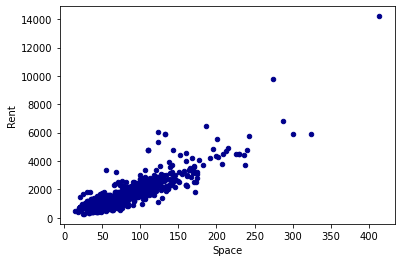

In [49]:
rentals.plot.scatter(x='Space',  y='Rent', c='DarkBlue')

Now, remove the outliers or both variables with the IQR method, and plot again

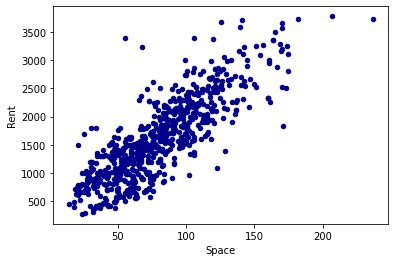

In [62]:
cleaned_rent_outliers = rentals[rentals.Rent <= highest]
cleaned_rent_outliers.plot.scatter(x='Space',  y='Rent', c='DarkBlue')

Calculate the correlation coefficients:

In [52]:
p_corr, _ = pearsonr(rentals.Rent, rentals.Space)
print("Pearson's correlation: %.3f" % p_corr)

Pearson's correlation: 0.856


In [53]:
s_corr, _ = spearmanr(rentals.Rent, rentals.Space)
print("Spearman's correlation: %.3f" % s_corr)

Spearman's correlation: 0.853
